Fit gauss on a range and plot it in a different one

[u'x', u'mean', u'sigma', 'N']


/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:24: InitialParamWarning: Parameter mean is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:24: InitialParamWarning: Parameter sigma is floating but does not have initial step size. Assume 1.
/work/mdonega/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:24: InitialParamWarning: Parameter N is floating but does not have initial step size. Assume 1.


FCN = 9.88086444275 
 TOTAL NCALL = 104 
 NCALLS = 104 
 
 
 EDM = 2.0004064266e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,mean,-0.094982,0.077123,,,,,No
1,sigma,1.0249,0.144761,,,,,No
2,N,1045.38,114.591,,,,,No


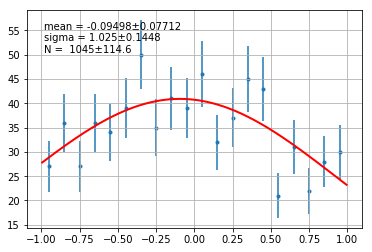

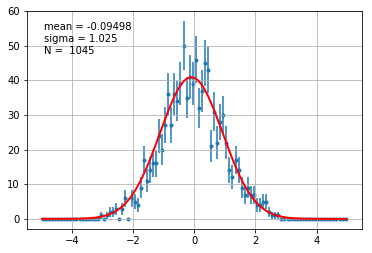

((array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
         -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
         -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
         -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
         -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
          0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
          1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
          2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
          3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
          4.9,  5. ]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  2.,  3.,  0.,
          3.,  6.,  0.,  6.,  5.,  4.,  9., 17., 11., 14., 16., 16., 24.,
         20., 27., 36., 27., 36., 34., 39., 50., 35., 41., 39., 46., 32.,
      

In [2]:
import matplotlib.pyplot as plt
import probfit, iminuit 
import probfit.pdf
%matplotlib inline

# Generate random data on a gaussian
import numpy as np
np.random.seed(0)
data = np.random.randn(1000)

#Build an Extended pdf in bound_gauss (basically adding a normalization term by hand)
bound_gauss=[-1.0, 1.0]
my_pdf=probfit.Extended(probfit.pdf.gaussian)
print iminuit.describe(my_pdf)

# Build the liklihood
binned_likelihood   = probfit.BinnedLH(my_pdf, data, bins=20, bound=bound_gauss, extended=True)

# Det some initial parameters to the fit
pars_gauss = dict(mean  = 1.0,
                  sigma = 1.0,
                  N = 1000)
# Fit
minuit = iminuit.Minuit(binned_likelihood,print_level=3, **pars_gauss)
minuit.migrad()
binned_likelihood.show(minuit)
# print minuit.values

# Now set a different bound
new_bound_gauss=[-5.0,5.0]

# Build the likelihood on the different bound 
# To have the same density of bins in the plot you have to rescale it (here 20 * (5.0 - -5.0) / (1.00- -1.00) = 100 )
my_likelihood   = probfit.BinnedLH(my_pdf, data, bins=100,bound=new_bound_gauss, extended=True)
# Fix by hand the parameters of the previous fit
# NB: you need to also fix the normalization to the previous one
my_likelihood.show(args={'mean':minuit.values['mean'], 'sigma':minuit.values['sigma'],'N':minuit.values['N']})

